In [ ]:
!pip install tensorflow-hub
!pip install tensorflow-datasets
!git clone https://github.com/beringresearch/lrfinder/
!cd lrfinder && python3 -m pip install .

In [ ]:
import tensorflow as tf
import tensorflow_datasets as tfds
from tensorflow.keras.callbacks import EarlyStopping
from lrfinder import LRFinder
K = tf.keras.backend
from keras.layers import GlobalAveragePooling2D, Dense, Conv2D, Flatten, Input, MaxPooling2D
from keras.layers import BatchNormalization, Dropout
from keras.models import Model
import numpy as np
import datetime
import os

In [ ]:
DATASET_NAME = 'rock_paper_scissors'

(dataset_train_raw, dataset_test_raw), dataset_info = tfds.load(
    name=DATASET_NAME,
    data_dir='tmp',
    with_info=True,
    as_supervised=True,
    split=[tfds.Split.TRAIN, tfds.Split.TEST],
)

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

0 examples [00:00, ? examples/s]

Shuffling and writing examples to tmp/rock_paper_scissors/3.0.0.incompleteAL7QBX/rock_paper_scissors-train.tfrecord


  0%|          | 0/2520 [00:00<?, ? examples/s]

0 examples [00:00, ? examples/s]

Shuffling and writing examples to tmp/rock_paper_scissors/3.0.0.incompleteAL7QBX/rock_paper_scissors-test.tfrecord


  0%|          | 0/372 [00:00<?, ? examples/s]

Dataset rock_paper_scissors downloaded and prepared to tmp/rock_paper_scissors/3.0.0. Subsequent calls will reuse this data.


In [ ]:
def preprocess_img(image, label):
    # Make image color values to be float.
    image = tf.cast(image, tf.float32)
    # Make image color values to be in [0..1] range.
    image = image / 255.
    # Make sure that image has a right size
    image = tf.image.resize(image, [256,256])
    return image, label

dataset_train = dataset_train_raw.map(preprocess_img)
dataset_test = dataset_test_raw.map(preprocess_img)

In [ ]:
print(dataset_train.cardinality().numpy())
print(dataset_test.cardinality().numpy())

2520
372


In [ ]:
dataset_train = dataset_train.cache().repeat(2).map(
    lambda image, label: (tf.image.random_flip_left_right(image), label)
)

In [ ]:
# !pip install tensorflow-datasets
import tensorflow as tf
import tensorflow_datasets as tfds


DATASET_NAME = 'rock_paper_scissors'

(dataset_train_raw, dataset_test_raw), dataset_info = tfds.load(
    name=DATASET_NAME,
    data_dir='tmp',
    with_info=True,
    as_supervised=True,
    split=[tfds.Split.TRAIN, tfds.Split.TEST],
)

def preprocess_img(image, label):
    # Make image color values to be float.
    image = tf.cast(image, tf.float32)
    # Make image color values to be in [0..1] range.
    image = image / 255.
    # Make sure that image has a right size
    image = tf.image.resize(image, [256,256])
    return image, label

dataset_train = dataset_train_raw.map(preprocess_img)
dataset_test = dataset_test_raw.map(preprocess_img)

print("Dataset Cardinality Before Augmentation: ",dataset_train.cardinality().numpy())

dataset_train = dataset_train.cache().repeat(2).map(
    lambda image, label: (tf.image.random_flip_left_right(image), label)
)

print("Dataset Cardinality After Augmentation: ",dataset_train.cardinality().numpy())

Dataset Cardinality Before Augmentation:  2520
Dataset Cardinality After Augmentation:  5040


In [ ]:
# !pip install tensorflow-datasets
import tensorflow as tf
import tensorflow_datasets as tfds
from tensorflow.keras.applications import ResNet50
from keras.layers import GlobalAveragePooling2D, Dense
from keras.layers import BatchNormalization, Dropout
from keras.models import Model

DATASET_NAME = 'rock_paper_scissors'

(dataset_train_raw, dataset_test_raw), dataset_info = tfds.load(
    name=DATASET_NAME,
    data_dir='tmp',
    with_info=True,
    as_supervised=True,
    split=[tfds.Split.TRAIN, tfds.Split.TEST],
)

def preprocess_img(image, label):
    # Make image color values to be float.
    image = tf.cast(image, tf.float32)
    # Make image color values to be in [0..1] range.
    image = image / 255.
    # Resizing Images to ensure same input size
    image = tf.image.resize(image, [256,256])
    return image, label

dataset_train = dataset_train_raw.map(preprocess_img)
dataset_test = dataset_test_raw.map(preprocess_img)

dataset_train = dataset_train.batch(64)
dataset_test = dataset_test.batch(32)


res = ResNet50(weights ='imagenet', include_top = False, 
               input_shape = (256, 256, 3)) 
res.trainable = False


x= res.output

x = GlobalAveragePooling2D()(x)

x = BatchNormalization()(x)

x = Dropout(0.5)(x) 
x = Dense(512, activation ='relu')(x)
x = BatchNormalization()(x)
x = Dropout(0.5)(x)



x = Dense(3, activation ='softmax')(x)
model = Model(res.input, x)


model.compile(optimizer ='Adam', 
              loss ="sparse_categorical_crossentropy", 
              metrics =["sparse_categorical_accuracy"])

model.summary()

In [ ]:
history = model.fit(dataset_train, epochs=10, validation_data=dataset_test)

Epoch 1/10
40/40 [==============================] - 577s 14s/step - loss: 0.2584 - sparse_categorical_accuracy: 0.9147 - val_loss: 1.1330 - val_sparse_categorical_accuracy: 0.4220
Epoch 2/10
40/40 [==============================] - 571s 14s/step - loss: 0.0646 - sparse_categorical_accuracy: 0.9802 - val_loss: 0.8574 - val_sparse_categorical_accuracy: 0.4247
Epoch 3/10
40/40 [==============================] - 571s 14s/step - loss: 0.0524 - sparse_categorical_accuracy: 0.9813 - val_loss: 0.7408 - val_sparse_categorical_accuracy: 0.6425
Epoch 4/10
40/40 [==============================] - 570s 14s/step - loss: 0.0376 - sparse_categorical_accuracy: 0.9881 - val_loss: 0.6260 - val_sparse_categorical_accuracy: 0.7016
Epoch 5/10
40/40 [==============================] - 570s 14s/step - loss: 0.0358 - sparse_categorical_accuracy: 0.9881 - val_loss: 0.5864 - val_sparse_categorical_accuracy: 0.6532
Epoch 6/10
40/40 [==============================] - 570s 14s/step - loss: 0.0366 - sparse_categorica

In [ ]:
!cd ..

In [ ]:
!pip install tensorflow-hub
!pip install tensorflow-datasets
!git clone https://github.com/beringresearch/lrfinder/
!cd lrfinder && python3 -m pip install .

In [ ]:
import numpy as np
from lrfinder import LRFinder
K = tf.keras.backend

BATCH = 64

# STEPS_PER_EPOCH = np.ceil(len(train_data) / BATCH)
# here Cardinality or Length of Train dataset is 2520


STEPS_PER_EPOCH = np.ceil(2520 / BATCH)
lr_finder = LRFinder(model)
lr_finder.find(dataset_train, start_lr=1e-6, end_lr=1, epochs=10,
               steps_per_epoch=STEPS_PER_EPOCH)
               
learning_rates = lr_finder.get_learning_rates()
losses = lr_finder.get_losses()

best_lr = lr_finder.get_best_lr(sma=20)
K.set_value(model.optimizer.lr, best_lr)

Epoch 1/10
40/40 [==============================] - 506s 13s/step - loss: 1.7503 - sparse_categorical_accuracy: 0.3639
Epoch 2/10
40/40 [==============================] - 499s 12s/step - loss: 1.5044 - sparse_categorical_accuracy: 0.4302
Epoch 3/10
40/40 [==============================] - 498s 12s/step - loss: 0.9737 - sparse_categorical_accuracy: 0.6163
Epoch 4/10
40/40 [==============================] - 495s 12s/step - loss: 0.4744 - sparse_categorical_accuracy: 0.8218
Epoch 5/10
40/40 [==============================] - 495s 12s/step - loss: 0.1946 - sparse_categorical_accuracy: 0.9313
Epoch 6/10
40/40 [==============================] - 495s 12s/step - loss: 0.1051 - sparse_categorical_accuracy: 0.9663
Epoch 7/10
40/40 [==============================] - 89s 2s/step - loss: 0.1114 - sparse_categorical_accuracy: 0.9576


In [ ]:
best_lr

6.309571e-05

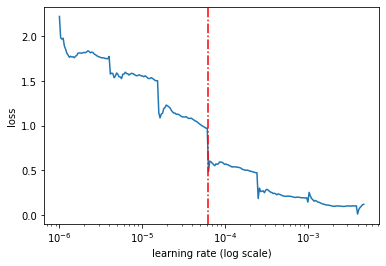

In [ ]:
import matplotlib.pyplot as plt

def plot_loss(learning_rates, losses, n_skip_beginning=10, n_skip_end=5, x_scale='log'):
    f, ax = plt.subplots()
    ax.set_ylabel("loss")
    ax.set_xlabel("learning rate (log scale)")
    ax.plot(learning_rates[:-1],
            losses[:-1])
    ax.set_xscale(x_scale)
    return(ax)

axs = plot_loss(learning_rates, losses)
axs.axvline(x=lr_finder.get_best_lr(sma=20), c='r', linestyle='-.')

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

earlystop_callback = EarlyStopping(
  monitor='val_loss', min_delta=0.0001, patience=2)

history = model.fit(dataset_train, epochs=20, validation_data=dataset_test, callbacks=[earlystop_callback])

Epoch 1/20
40/40 [==============================] - 568s 14s/step - loss: 0.2397 - sparse_categorical_accuracy: 0.9179 - val_loss: 0.8636 - val_sparse_categorical_accuracy: 0.6263
Epoch 2/20
40/40 [==============================] - 567s 14s/step - loss: 0.1895 - sparse_categorical_accuracy: 0.9298 - val_loss: 0.7811 - val_sparse_categorical_accuracy: 0.8065
Epoch 3/20
40/40 [==============================] - 569s 14s/step - loss: 0.1717 - sparse_categorical_accuracy: 0.9409 - val_loss: 0.7074 - val_sparse_categorical_accuracy: 0.8575
Epoch 4/20
40/40 [==============================] - 568s 14s/step - loss: 0.1395 - sparse_categorical_accuracy: 0.9544 - val_loss: 0.6371 - val_sparse_categorical_accuracy: 0.8575
Epoch 5/20
40/40 [==============================] - 568s 14s/step - loss: 0.1254 - sparse_categorical_accuracy: 0.9560 - val_loss: 0.5898 - val_sparse_categorical_accuracy: 0.8199
Epoch 6/20
40/40 [==============================] - 568s 14s/step - loss: 0.1169 - sparse_categorica